In [1]:
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
import numpy as np
from matplotlib import pyplot as plt
from utils.helper import read_data
import utils.processing as processing
import matplotlib.pyplot as plt

In [2]:
FOLDER = 'data2/'
data_after_s = [read_data(FOLDER + "data_after_sport_20_s_1" + ".csv")]
data_befor_s = [read_data(FOLDER + "data_before_sport_20_s_1" +  ".csv")]
data_without_br = [read_data(FOLDER + "data_without_breathing_20_s_1" + ".csv")]
print(f"Shape static data: {data_after_s[0].shape}")
print(f"Shape static_f data: {data_befor_s[0].shape}")
print(f"Shape moving data: {data_without_br[0].shape}")

Shape static data: (3, 20000, 64)
Shape static_f data: (3, 20000, 64)
Shape moving data: (3, 20000, 64)


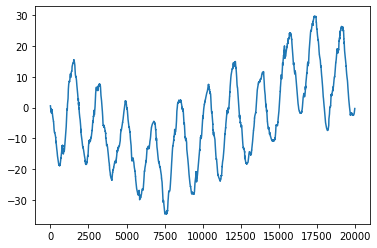

In [15]:
phases, abses, _, _ = processing.do_processing(data_after_s[0]) 
phases_after_s = np.mean(phases, axis=0)

plt.plot(phases_after_s)

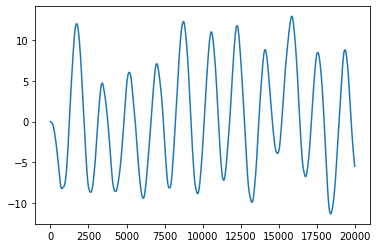

In [4]:
from scipy import signal
from utils.helper import filter_gauss

smoothed_data1 = filter_gauss(phases_after_s, kernel_factor=20, sigma=25)
bpm1 = signal.butter(1, [0.2, 0.5], "bandpass", fs=1000, output="sos")
filtered_after_s = signal.sosfilt(bpm1, smoothed_data1)
plt.plot(filtered_after_s)

(0.0, 5.0)

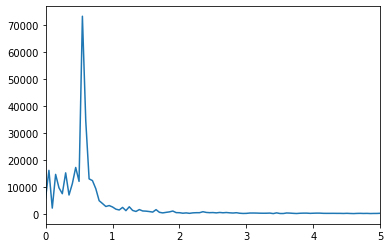

In [5]:
SAMPLE_RATE = 1000
DURATION = 20
N = SAMPLE_RATE * DURATION

yf = rfft(filtered_after_s)
xf = rfftfreq(N, 1 / SAMPLE_RATE)
# plt.plot(xf)

plt.plot(xf, np.abs(yf))
plt.xlim([0, 5])

Get only BR frequnecy

33.0


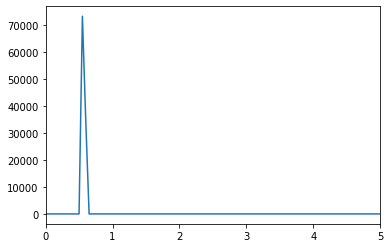

In [6]:
yf_abs = np.abs(yf)
indices = yf_abs > (0.3 * np.max(yf_abs))
yf_clean = indices * yf

plt.plot(xf,np.abs(yf_clean))
plt.xlim([0, 5])

bpm_frequency_after_s = xf[np.argmax(yf_clean)]
print(bpm_frequency_after_s*60)

In [7]:
phases, abses, _, _ = processing.do_processing(data_befor_s[0]) 
phases_befor_s = np.mean(phases, axis=0)

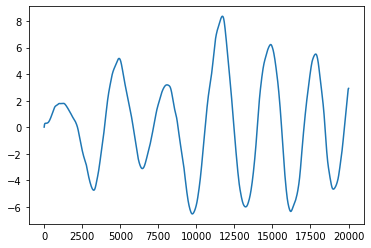

In [8]:
smoothed_data2 = filter_gauss(phases_befor_s, kernel_factor=20, sigma=25)
bpm2 = signal.butter(1, [0.2, 0.5], "bandpass", fs=1000, output="sos")
filtered_befor_s = signal.sosfilt(bpm2, smoothed_data2)
plt.plot(filtered_befor_s)

(0.0, 5.0)

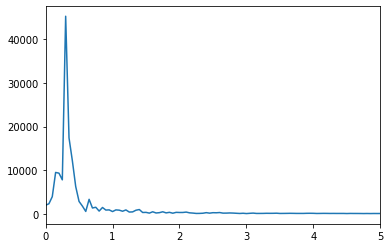

In [9]:
SAMPLE_RATE = 1000
DURATION = 20
N = SAMPLE_RATE * DURATION

yf2 = rfft(filtered_befor_s)
xf2 = rfftfreq(N, 1 / SAMPLE_RATE)
# plt.plot(xf2)

plt.plot(xf2, np.abs(yf2))
plt.xlim([0, 5])

21.000000000000004


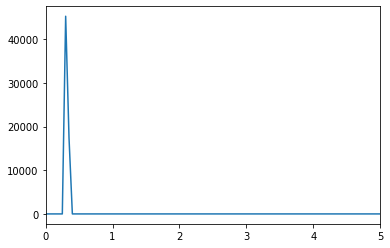

In [10]:
yf_abs2 = np.abs(yf2)
indices2 = yf_abs2 > (0.3 * np.max(yf_abs2))
yf_clean2 = indices2 * yf2

plt.plot(xf,np.abs(yf_clean2))
plt.xlim([0, 5])

bpm_frequency_befor_s = xf[np.argmax(yf_clean2)]
print(bpm_frequency_befor_s*60)

In [11]:
phases, abses, _, _ = processing.do_processing(data_without_br[0]) 
phases_without_br = np.mean(phases, axis=0)

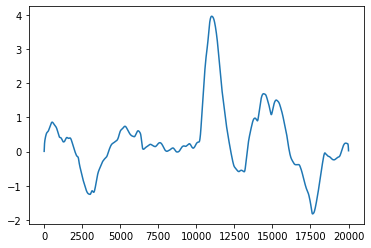

In [12]:
smoothed_data3 = filter_gauss(phases_without_br, kernel_factor=20, sigma=25)
bpm3 = signal.butter(1, [0.2, 0.5], "bandpass", fs=1000, output="sos")
filtered_without_br = signal.sosfilt(bpm3, smoothed_data3)
plt.plot(filtered_without_br)

(0.0, 5.0)

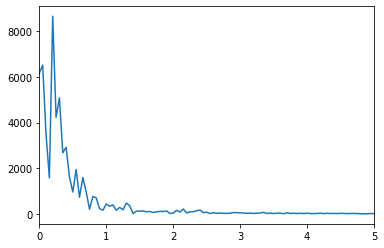

In [13]:
SAMPLE_RATE = 1000
DURATION = 20
N = SAMPLE_RATE * DURATION

yf3 = rfft(filtered_without_br)
xf3 = rfftfreq(N, 1 / SAMPLE_RATE)
# plt.plot(xf3)

plt.plot(xf3, np.abs(yf3))
plt.xlim([0, 5])

12.0


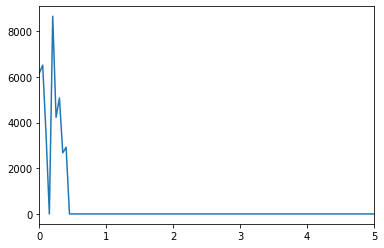

In [14]:
yf_abs3 = np.abs(yf3)
indices3 = yf_abs3 > (0.3 * np.max(yf_abs3))
yf_clean3 = indices3 * yf3

plt.plot(xf3,np.abs(yf_clean3))
plt.xlim([0, 5])

bpm_frequency_without_br = xf3[np.argmax(yf_clean3)]
print(bpm_frequency_without_br*60)